<a href="https://colab.research.google.com/github/laelalexander/BEPs/blob/master/Python_Code_for_FTIR_Analysis_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FTIR analysis plot saved as ftir_analysis_plot.png


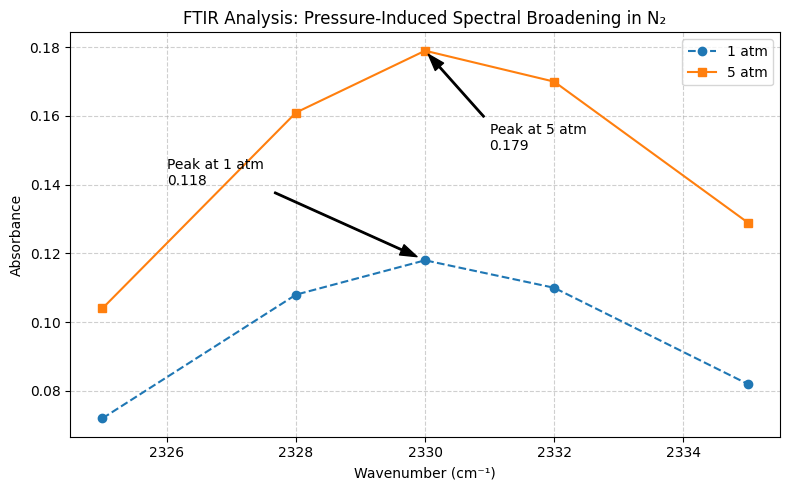

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the user's research paper (Table S2)
# This represents the absorbance of N₂ at different wavenumbers
# under 1 atm and 5 atm of pressure.
data = pd.DataFrame({
    'wavenumber': [2325, 2328, 2330, 2332, 2335],  # Wavenumber in cm⁻¹
    '1atm': [0.072, 0.108, 0.118, 0.110, 0.082],    # Absorbance at 1 atm
    '5atm': [0.104, 0.161, 0.179, 0.170, 0.129]     # Absorbance at 5 atm
})

# Create the plot
# Initialize a figure and an axes object for the plot.
# `figsize` controls the dimensions of the plot.
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the 1 atm data
# 'wavenumber' is on the x-axis, '1atm' (absorbance) is on the y-axis.
# `marker='o'` places circular markers at each data point.
# `linestyle='--'` creates a dashed line connecting the points.
# `label='1 atm'` is for the legend.
ax.plot(data['wavenumber'], data['1atm'], marker='o', linestyle='--', label='1 atm')

# Plot the 5 atm data
# Similar to the 1 atm data, but with square markers ('s') and a solid line ('-').
ax.plot(data['wavenumber'], data['5atm'], marker='s', linestyle='-', label='5 atm')


# Add labels and title for publication quality
ax.set_xlabel("Wavenumber (cm⁻¹)")  # Label for the x-axis
ax.set_ylabel("Absorbance")          # Label for the y-axis
ax.set_title("FTIR Analysis: Pressure-Induced Spectral Broadening in N₂") # Title of the plot
ax.legend()  # Display the legend (shows which line corresponds to 1 atm vs 5 atm)
ax.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability

# Highlight the peak absorbance values for clarity
# Find the data point with the maximum absorbance for 1 atm
peak_1atm = data.loc[data['1atm'].idxmax()]
# Find the data point with the maximum absorbance for 5 atm
peak_5atm = data.loc[data['5atm'].idxmax()]

# Add an annotation for the 1 atm peak
# `xy` is the point to annotate (wavenumber, absorbance).
# `xytext` is the position of the text label.
# `arrowprops` defines the appearance of the arrow pointing to the data.
plt.annotate(f"Peak at 1 atm\n{peak_1atm['1atm']:.3f}",
             xy=(peak_1atm['wavenumber'], peak_1atm['1atm']),
             xytext=(2326, 0.14), # Adjusted for better placement
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             )

# Add an annotation for the 5 atm peak
plt.annotate(f"Peak at 5 atm\n{peak_5atm['5atm']:.3f}",
             xy=(peak_5atm['wavenumber'], peak_5atm['5atm']),
             xytext=(2331, 0.15), # Adjusted for better placement
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             )

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Save the figure as a PNG file with high resolution (300 DPI)
plt.savefig("ftir_analysis_plot.png", dpi=300)

# Print a confirmation message to the console
print("FTIR analysis plot saved as ftir_analysis_plot.png")